# MVP Cognitive Search Application using OCR approach 

In [60]:
from pdf2image import convert_from_path
import easyocr
import numpy as np 
import PIL
from PIL import ImageDraw
import spacy 

In [61]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [62]:
images = convert_from_path('./PDF_docs/09_080661e_Golpanol_ALS.pdf')

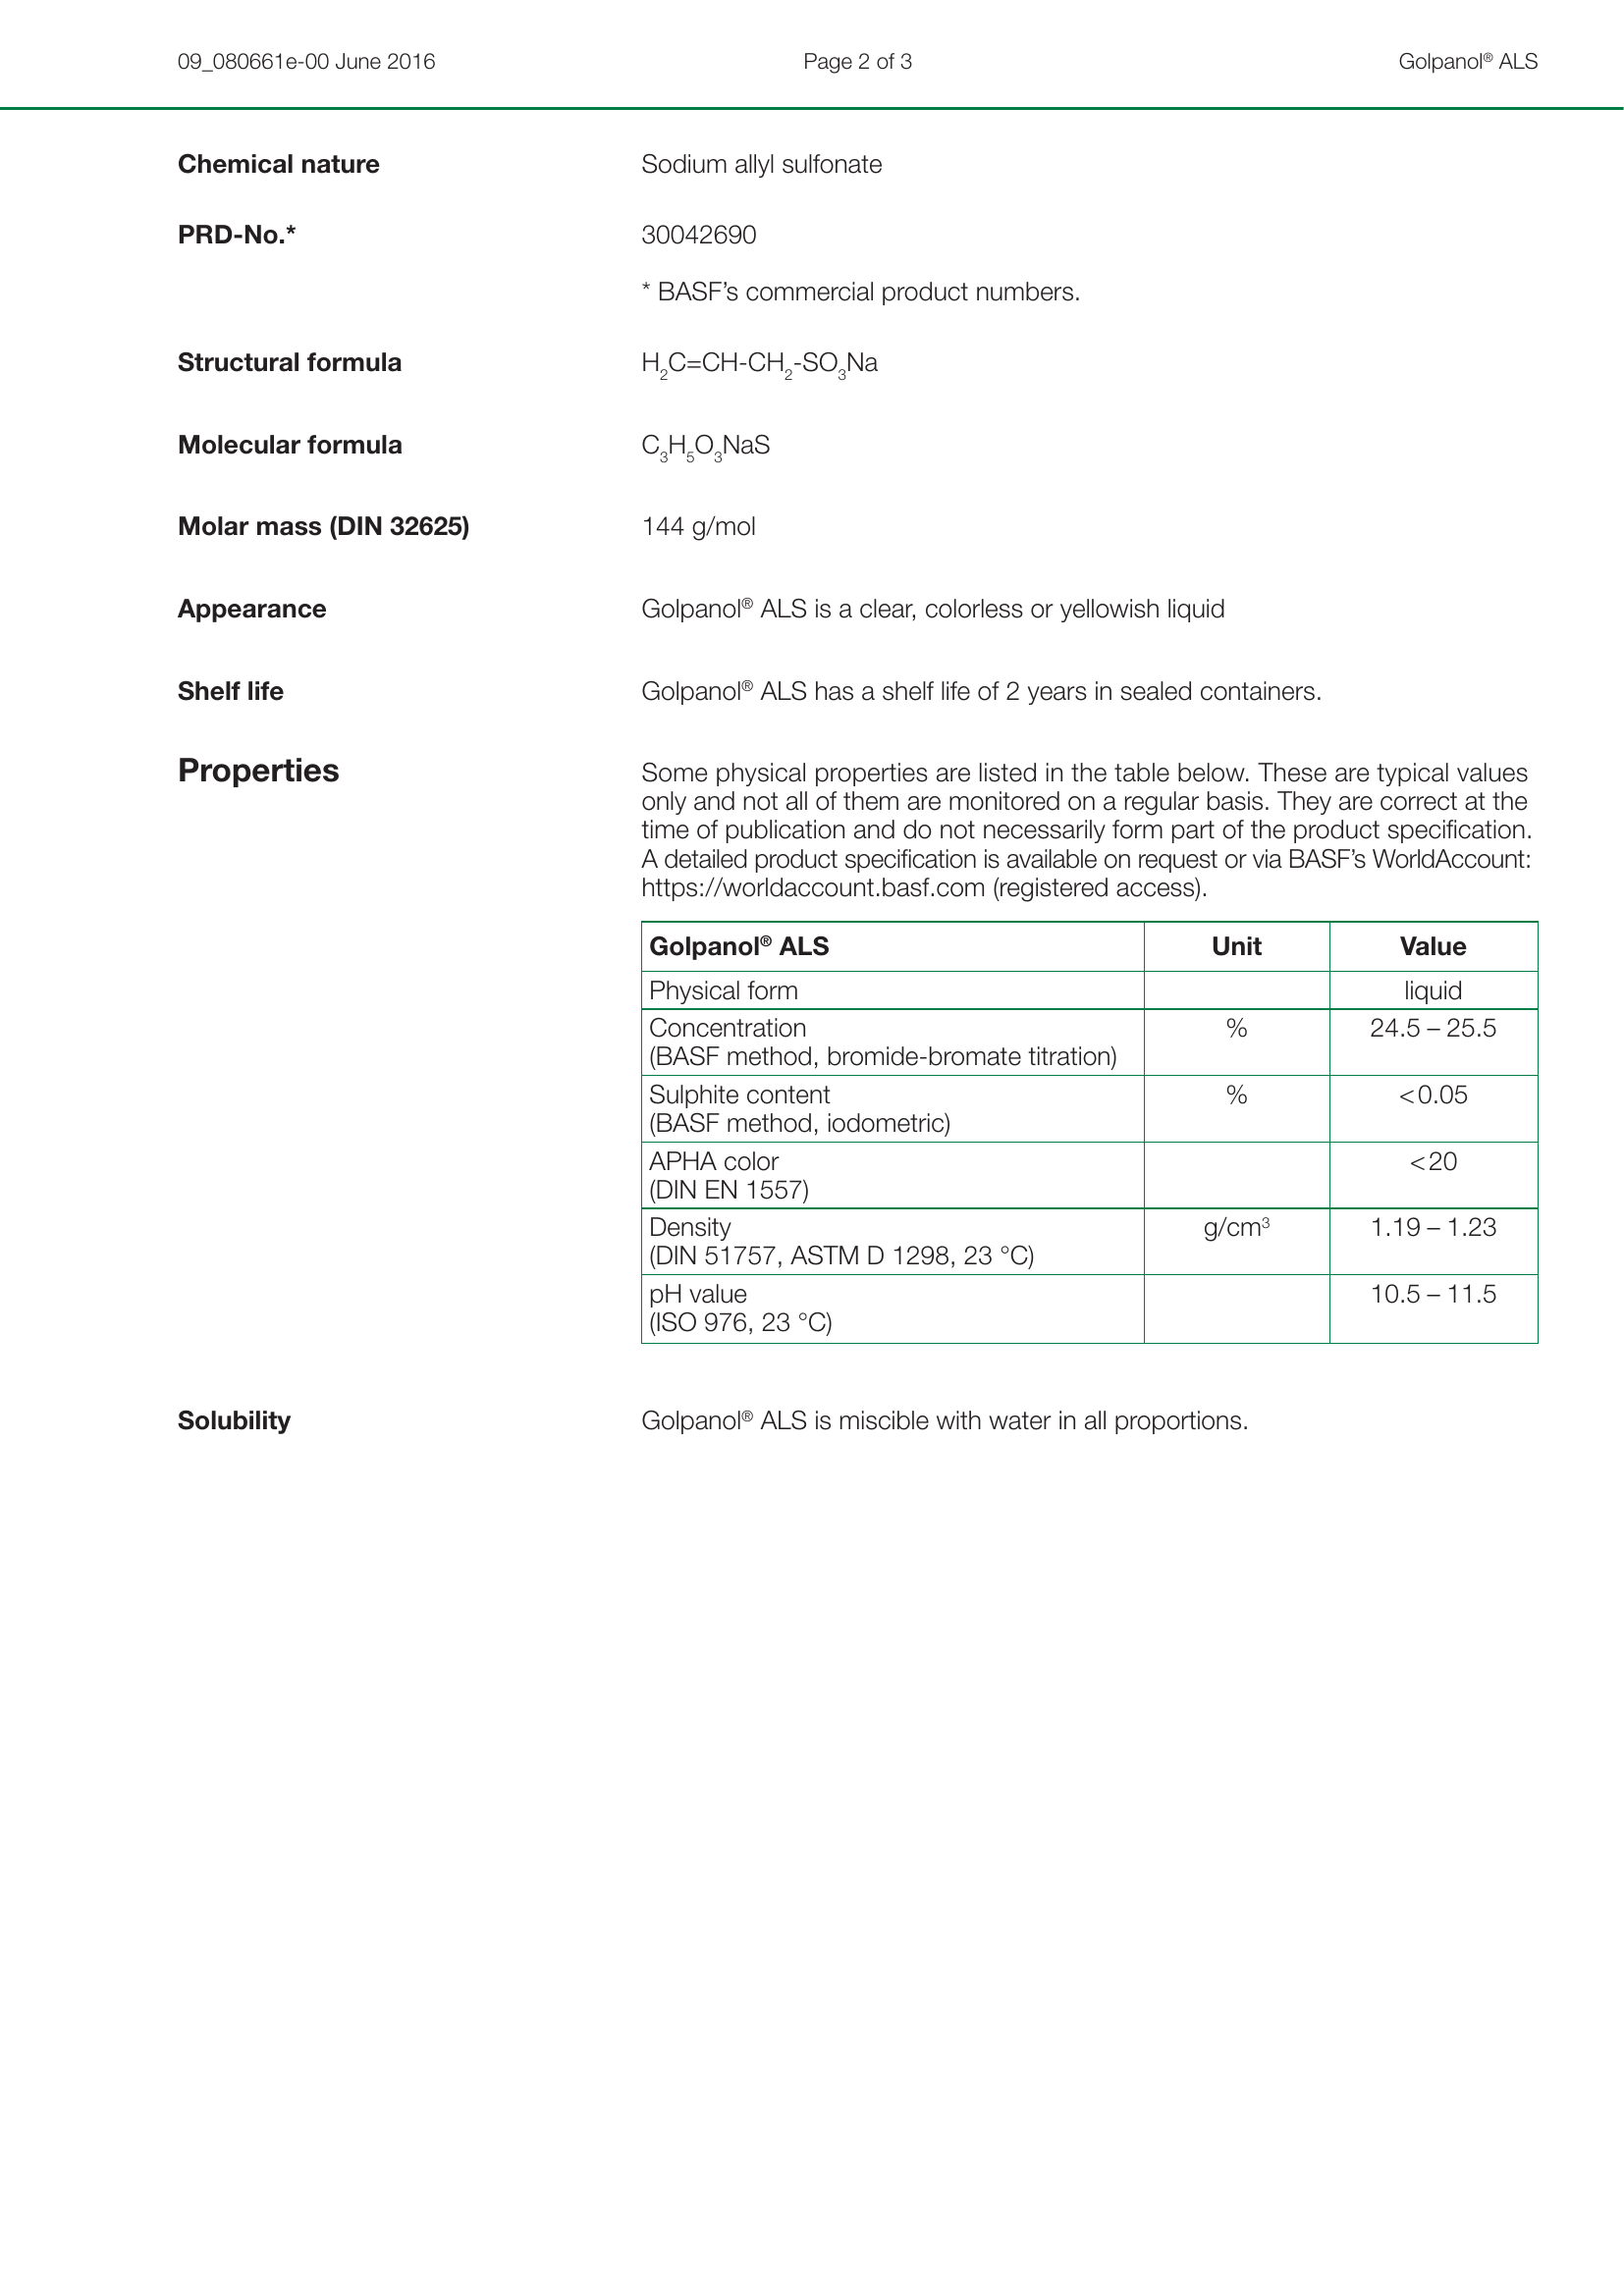

In [63]:
from IPython.display import display, Image
display(images[1])

In [64]:
bounds = reader.readtext(np.array(images[1]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=10)

bounds

[([[178, 50], [446, 50], [446, 74], [178, 74]],
  '09_080661e-00 June 2016',
  0.6925467630528471),
 ([[814, 49], [932, 49], [932, 79], [814, 79]],
  'Page 2 of3',
  0.6312258278811222),
 ([[1422, 50], [1570, 50], [1570, 76], [1422, 76]],
  'Golpanol@ ALS',
  0.4843547220218611),
 ([[180, 152], [390, 152], [390, 182], [180, 182]],
  'Chemical nature',
  0.999642776161761),
 ([[650, 152], [902, 152], [902, 184], [650, 184]],
  'Sodium allyl sulfonate',
  0.8435596028441638),
 ([[180, 224], [296, 224], [296, 254], [180, 254]],
  'PRD-No.',
  0.9914732110984972),
 ([[650, 224], [776, 224], [776, 254], [650, 254]],
  '30042690',
  0.9999256518143959),
 ([[667, 279], [1099, 279], [1099, 317], [667, 317]],
  "BASF's commercial product numbers",
  0.9091367467642495),
 ([[178, 354], [414, 354], [414, 384], [178, 384]],
  'Structural formula',
  0.9879260609173957),
 ([[650, 345], [900, 345], [900, 396], [650, 396]],
  'H,C=CH-CH,-$0,Na',
  0.45923357752393645),
 ([[179, 438], [414, 438], [414

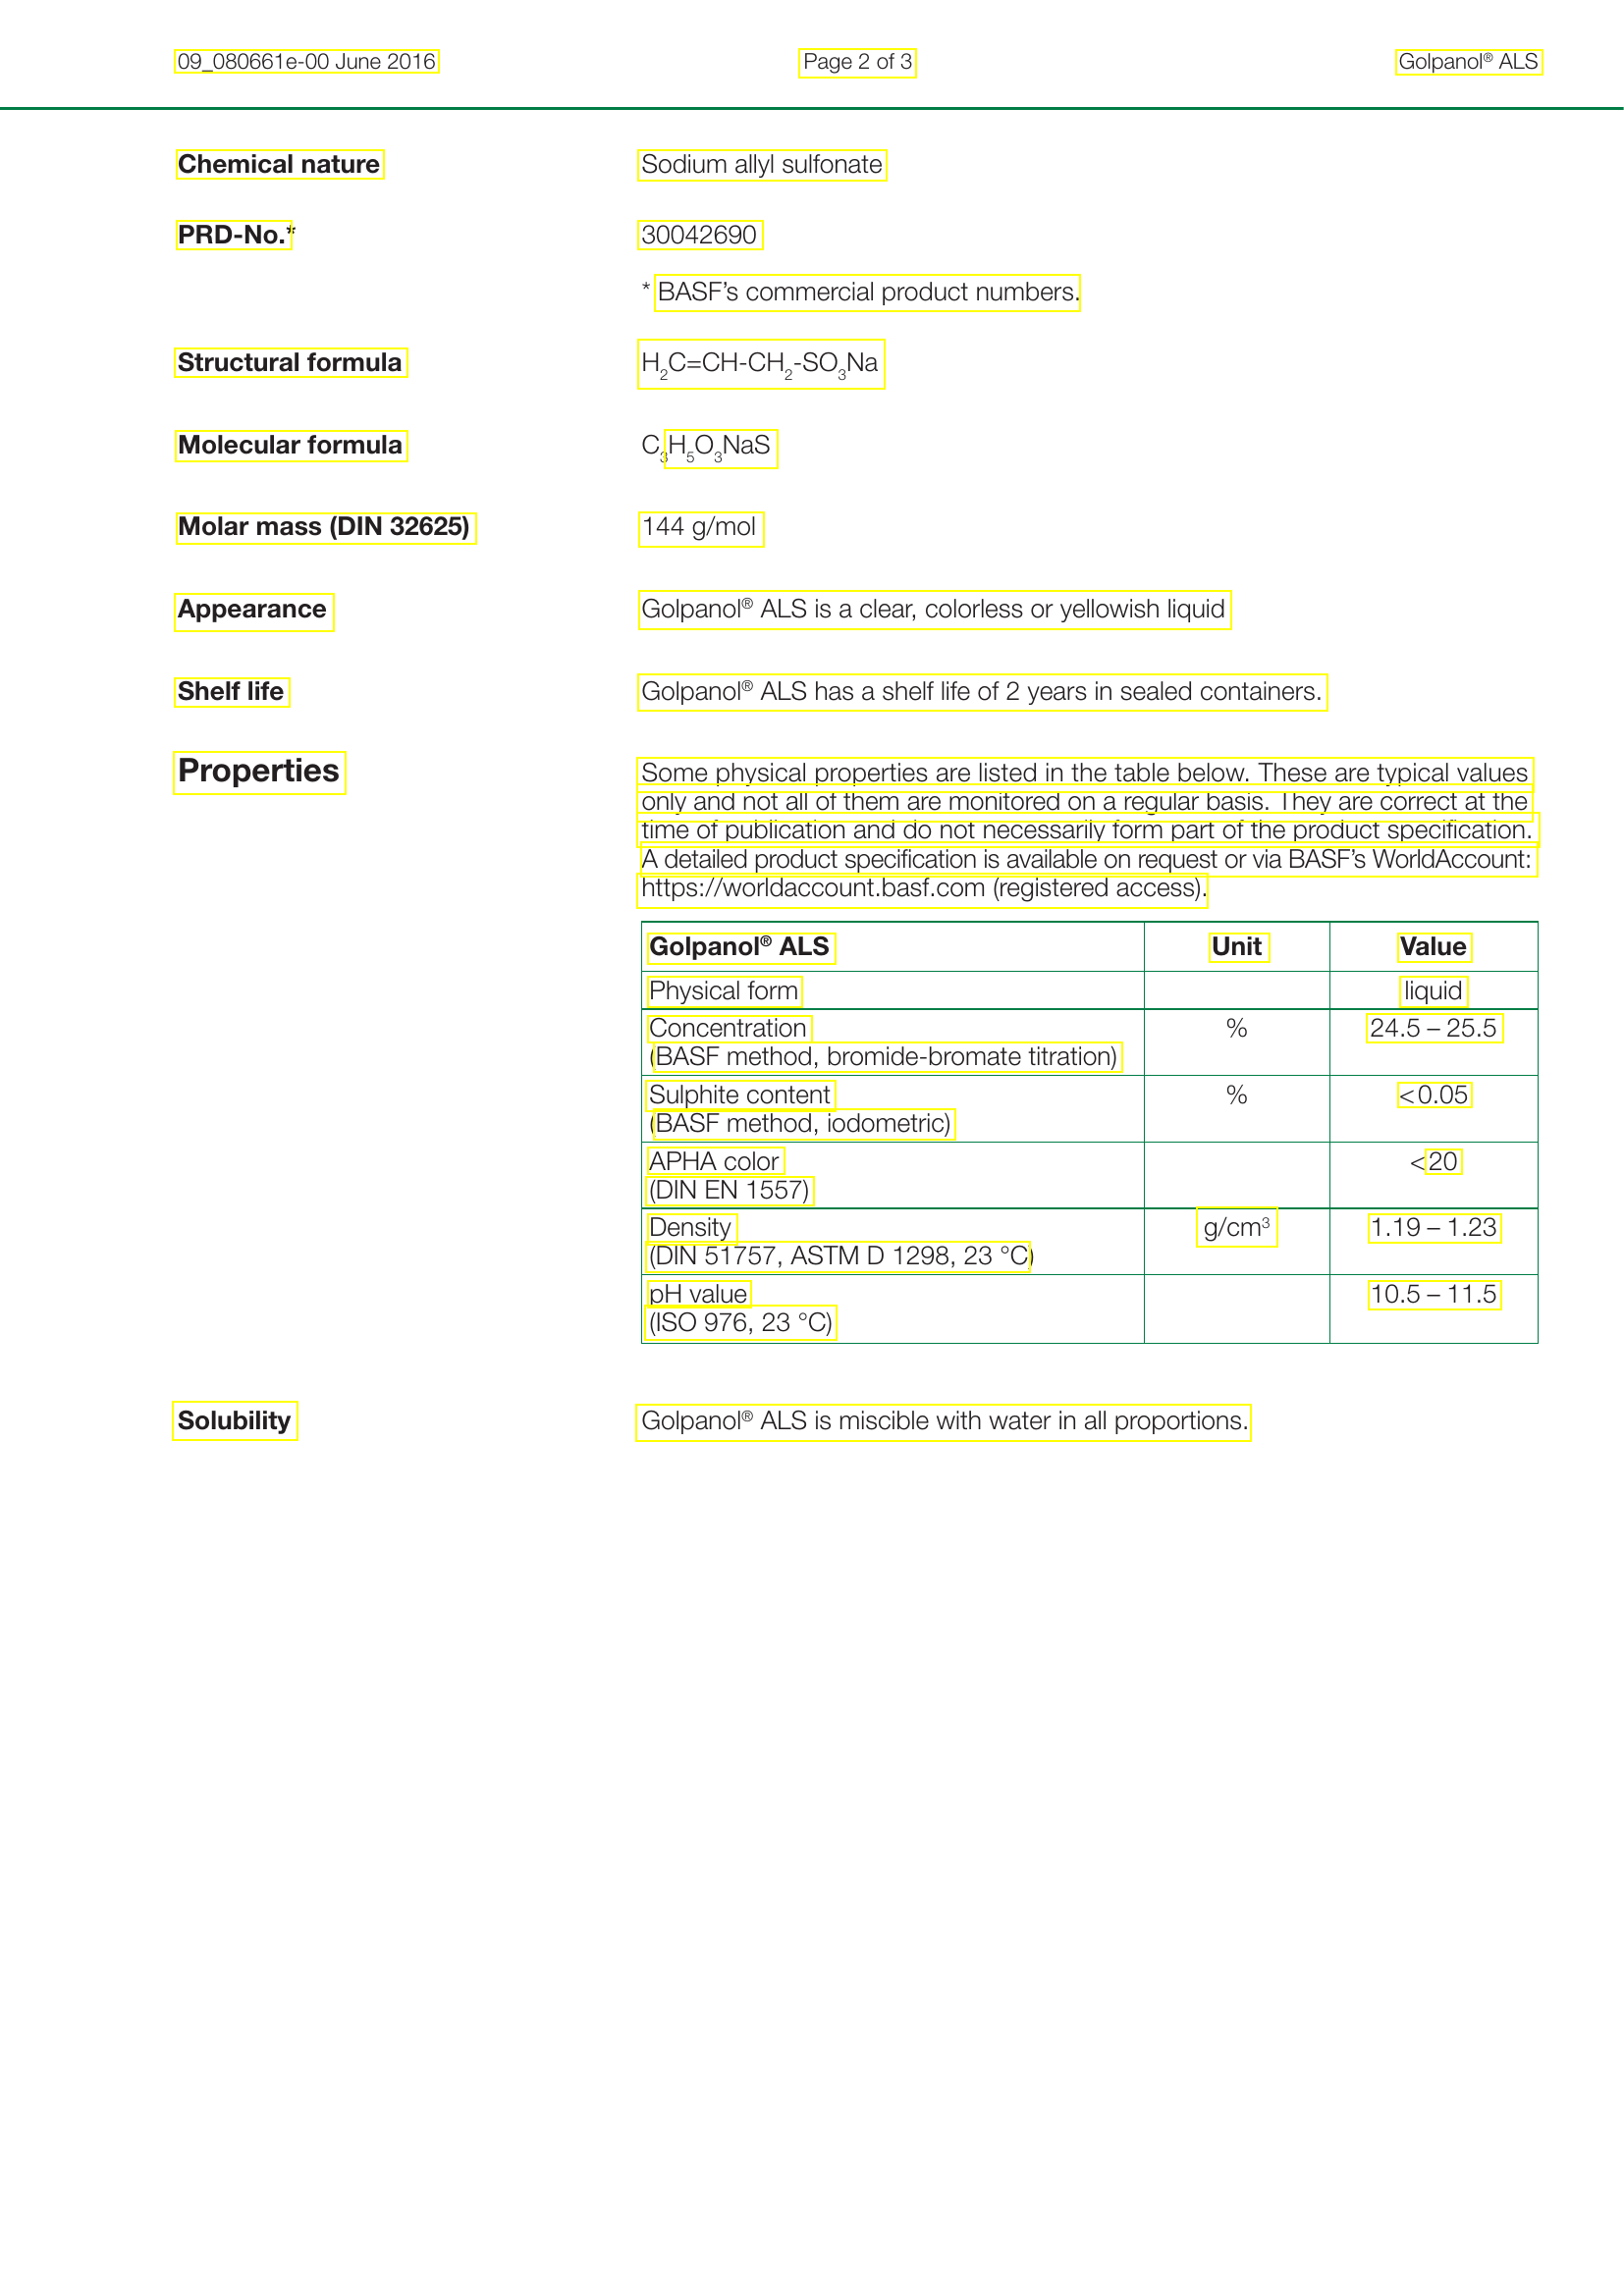

In [65]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width = width)
    return image

draw_boxes(images[1], bounds)

In [75]:
text = ''
for i in range(len(bounds)):
    text = text + bounds[i][1] + '\n'

print (text)

09_080661e-00 June 2016
Page 2 of3
Golpanol@ ALS
Chemical nature
Sodium allyl sulfonate
PRD-No.
30042690
BASF's commercial product numbers
Structural formula
H,C=CH-CH,-$0,Na
Molecular formula
H5O,NaS
Molar mass (DIN 32625)
144 g/mol
Appearance
Golpanol9 ALS is a clear, colorless or yellowish liquid
Shelf life
Golpanol9 ALS has a shelf life of 2 years in sealed containers.
Properties
Some physical properties are listed in the table below. These are typical values
only and not all of them are monitored on a regular basis. They are correct at the
time of publication and do not necessarily form part of the product specification.
A detailed product specification is available on request or via BASF's WorldAccount:
https:/lworldaccount basf com registered access).
Golpanol9 ALS
Unit
Value
Physical form
liquid
Concentration
24.5- 25.5
BASF method, bromide bromate titration)
Sulphite content
<0.05
BASF method, iodometric)
APHA color
20
DIN EN1557)
Density
glcm3
1.19-1.23
(DIN/ 51757, A$TMD 129

In [67]:
nlp = spacy.load('en_core_web_sm')

In [68]:
doc = nlp(text)

In [69]:
from spacy import displacy
displacy.render(nlp(doc.text), style='ent', jupyter=True)

In [89]:
f = open('txt.txt', 'w')
f.write(text)
f.close()
